# Sprint 1

In [34]:
import utils
import matplotlib.pyplot as plt

In [28]:
df = utils.import_attrition_data()
df

['data\\customer_attrition_0.csv', 'data\\customer_attrition_1.csv', 'data\\customer_attrition_2.csv', 'data\\customer_attrition_3.csv', 'data\\customer_attrition_4.csv']


,num_kids,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,-,15634602,619,France,Female,42,2,0.00,1,1.0,1,101348.88,1
1,-,15647311,608,Spain,Female,41,1,83807.86,1,0.0,1,112542.58,0
2,-,15619304,502,France,Female,42,8,159660.80,3,1.0,0,113931.57,1
3,-,15701354,699,France,Female,39,1,0.00,2,0.0,0,93826.63,0
4,-,15737888,850,Spain,Female,43,2,125510.82,1,1.0,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10001,-,15606229,771,France,Male,39,5,0.00,2,1.0,0,96270.64,0
10002,-,15569892,516,France,Male,35,10,57369.61,1,1.0,1,101699.77,0
10003,-,15584532,709,France,Female,36,7,0.00,1,0.0,1,42085.58,1
10004,-,15682355,772,Germany,Male,42,3,75075.31,2,1.0,0,92888.52,1


# AT09

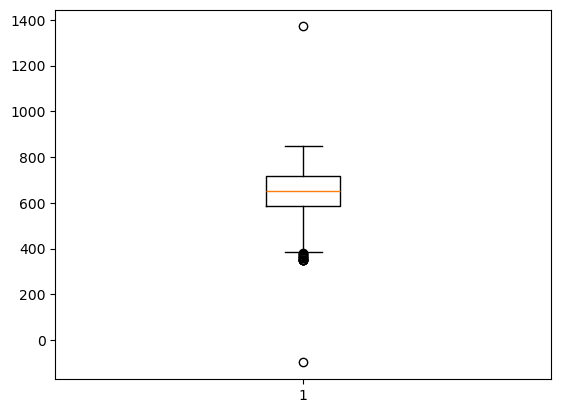

In [ ]:
fig, ax = plt.subplots()

VP = ax.boxplot(df["credit_score"])

plt.show()

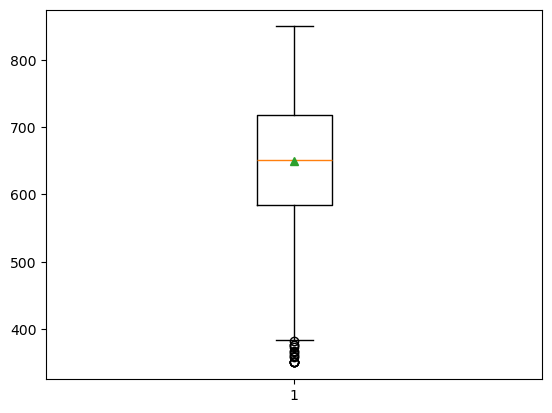

In [39]:
median = df["credit_score"].median()

df.loc[df["credit_score"] < 0, "credit_score"] = median
df.loc[df["credit_score"] > 1000, "credit_score"] = median

df

plt.boxplot(df["credit_score"], showmeans=True)
plt.show()

# AT15

## Gender Analysis

In [29]:
df["gender"].value_counts()

gender
Male      5451
Female    4535
-            4
M            3
male         2
F            2
female       2
Name: count, dtype: int64

## Cleaning

In [30]:
df.loc[df["gender"] == "F", "gender"] = "Female"
df.loc[df["gender"] == "female", "gender"] = "Female"

df.loc[df["gender"] == "M", "gender"] = "Male"
df.loc[df["gender"] == "male", "gender"] = "Male"

df["gender"].value_counts()

gender
Male      5456
Female    4539
-            4
Name: count, dtype: int64

In [31]:
df.loc[df["gender"] == "-"]

,num_kids,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
1611,-,15781553,760,Germany,-,49,9,91502.99,1,1.0,0,117232.90,1
1623,-,15804516,589,France,-,38,2,0.00,1,1.0,0,79915.28,0
1980,-,15775880,554,France,-,30,9,0.00,2,1.0,1,40320.30,0
1988,-,15657107,563,Spain,-,46,8,106171.68,1,1.0,0,163145.50,1


# AT16

## Analysis

In [32]:
df.describe(include="all")

,num_kids,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000,1.000000e+04,10000.00000,10000,9999,10000.000000,10000.000000,10000.000000,10000.000000,9997.000000,10000.000000,10000.000000,10000.000000
unique,1,NaN,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,-,NaN,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,10000,NaN,NaN,5014,5456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.569094e+07,650.51820,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.705512,0.515100,100090.239881,0.203700
std,NaN,7.193619e+04,97.20821,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.455835,0.499797,57510.492818,0.402769
min,NaN,1.556570e+07,-98.00000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,NaN,1.562853e+07,584.00000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,NaN,1.569074e+07,652.00000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100193.915000,0.000000
75%,NaN,1.575323e+07,718.00000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.000000,1.000000,149388.247500,0.000000


## Cleaning

In [33]:
df = df.drop("num_kids", axis=1)

df = df.drop("customer_id", axis=1)

df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1.0,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0.0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1.0,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0.0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1.0,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
10001,771,France,Male,39,5,0.00,2,1.0,0,96270.64,0
10002,516,France,Male,35,10,57369.61,1,1.0,1,101699.77,0
10003,709,France,Female,36,7,0.00,1,0.0,1,42085.58,1
10004,772,Germany,Male,42,3,75075.31,2,1.0,0,92888.52,1
